In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Lectura de polizas.feather

 - Se considera que una cliente se dió de baja si no tiene polizas vigentes por 3 meses

In [2]:
df_polizas = pd.read_feather('../../../data/interim/polizas.feather')

/home/voolkia/anaconda3/envs/test/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [12]:
df_polizas["NUM_SECU_POL"].isna().sum()

0

In [4]:
df_polizas["CIF_ID"].isna().sum()

4128

In [17]:
df_polizas["CIF_ID"].nunique()

847206

In [10]:
df_polizas.head(5)

,NUM_SECU_POL,NUM_POL1,FECHA_VIG_POL,FECHA_VENC_POL,COD_PLAN,COD_PROD,COD_COBRO,ESTADO_CIVIL_ASEGURADO,COD_POSTAL,IMP_BONIFICACION_MES,IMP_PREMIO_MES,IMP_PRIMA_FACT_MES,IMP_IMPUESTO_MES,FECHA_PROCESO,MCA_VIGENCIA,COD_COBRO_ANTERIOR,COD_MON,FECHA_VIG_ORIG_POL,MCA_AGRAVANTE,MCA_EMPLEADO,CAPITAL_VEHICULO,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,COD_RIES,ANTIGUEDAD,PRENDARIO,NEGOCIO,MCA_POLIZA_VIP,FECHA_EMI,PORC_COMISION,IMP_COMISION_LOCAL,CANT_RENOVACION,FECHA_ANTIG,ANTIG,CLIENTE_SUSCRIPTO,FECHA_VIG_POL_NPO,SEGMENTO,SEGMENTO_2,COD_ZONA_CASCO,PROXIMA_FECHA_RENOV,NEGOCIO_DESC,COD_SITUACION,CLAU_AJUSTE,COEF_POL,RULE_ID_RESPUESTA,CIF_ID,SEGMENTO_CLIENTE,mes_anio_renov
0,1883348309999,4001010810003,2019-01-05,2019-02-05,963.0,74329,BA,SO,6500004,-0.16,1873.21,1502.45,370.76,2019-01-31,S,BA,1,2018-11-05,N,N,438600.0,1080.0,428400.0,1,801.0,N,DEFD,S,2018-11-05,24.0,360.55,3.0,2016-11-21,775.0,N,2018-11-05,ALTO,ALTO,11.0,2019-05-05,MOSTRADOR D,CT,5.0,0.083333,95357.0,21477852.0,2,01-2019
1,1883348439999,5280008816503,2019-01-05,2019-02-05,942.0,72043,PP,CA,6300000,-0.20,1881.32,1504.50,376.83,2019-01-31,S,PP,1,2018-11-05,N,N,801000.0,1080.0,663000.0,1,1798.0,S,PP,S,2018-11-05,0.0,0.00,3.0,2014-02-28,1772.0,S,2018-11-05,ALTO,ALTO,2.0,2019-02-05,Prendarios,EP,5.0,0.083333,95357.0,10359740.0,2,01-2019
2,1883348519999,6010040998803,2019-01-05,2019-02-05,724.0,73852,TM,SO,1888032,0.00,727.61,583.59,144.02,2019-01-31,S,TM,1,2018-11-05,S,N,82800.0,0.0,79500.0,1,87.0,N,AMV2,N,2018-11-05,31.0,180.91,3.0,2018-11-05,61.0,S,2018-11-05,None,None,1.0,2019-02-05,AMV CONCESIONARIOS,CT,NaN,0.083333,NaN,22833168.0,3,01-2019
3,1883348579999,5450053609603,2019-01-06,2019-02-06,969.0,25674,TM,SO,1716000,0.00,2538.93,2036.37,502.55,2019-01-31,S,TM,1,2018-11-06,N,N,438000.0,1080.0,367200.0,1,1960.0,N,DEFB,S,2018-11-05,22.0,448.00,3.0,2013-09-16,1938.0,N,2018-11-06,ALTO,ALTO,1.0,2019-05-06,MOSTRADOR B,CT,5.0,0.083333,95357.0,19244514.0,2,01-2019
4,1883348679999,6040057835503,2019-01-05,2019-02-05,723.0,73925,TM,SO,1663015,0.00,192.74,154.59,38.15,2019-01-31,S,TM,1,2018-11-05,S,N,0.0,0.0,18900.0,1,87.0,N,AMV2,N,2018-11-05,31.0,47.92,3.0,2018-11-05,61.0,S,2018-11-05,None,None,1.0,2019-05-05,AMV CONCESIONARIOS,CT,NaN,0.083333,NaN,22833170.0,3,01-2019


In [33]:
fechas = [col for col in df_polizas.columns if 'FECHA' in col]
df_polizas[fechas].head(5)

,FECHA_VIG_POL,FECHA_VENC_POL,FECHA_PROCESO,FECHA_VIG_ORIG_POL,FECHA_EMI,FECHA_ANTIG,FECHA_VIG_POL_NPO,PROXIMA_FECHA_RENOV
0,2019-01-05,2019-02-05,2019-01-31,2018-11-05,2018-11-05,2016-11-21,2018-11-05,2019-05-05
1,2019-01-05,2019-02-05,2019-01-31,2018-11-05,2018-11-05,2014-02-28,2018-11-05,2019-02-05
2,2019-01-05,2019-02-05,2019-01-31,2018-11-05,2018-11-05,2018-11-05,2018-11-05,2019-02-05
3,2019-01-06,2019-02-06,2019-01-31,2018-11-06,2018-11-05,2013-09-16,2018-11-06,2019-05-06
4,2019-01-05,2019-02-05,2019-01-31,2018-11-05,2018-11-05,2018-11-05,2018-11-05,2019-05-05


In [37]:
data = {}
for col in fechas:
    data[col] = [df_polizas[col].min(),df_polizas[col].max()]
pd.DataFrame(data, index =['MIN', 'MAX'])

,FECHA_VIG_POL,FECHA_VENC_POL,FECHA_PROCESO,FECHA_VIG_ORIG_POL,FECHA_EMI,FECHA_ANTIG,FECHA_VIG_POL_NPO,PROXIMA_FECHA_RENOV
MIN,2018-01-01,2018-12-01,2019-01-31,1995-03-01,2018-06-05,1995-03-01,1995-03-01,2019-02-01
MAX,2019-05-31,2020-11-30,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2020-07-11


In [5]:
df_polizas['mes_anio_vig'] = df_polizas['FECHA_VIG_POL'].dt.strftime('%Y-%m')

In [39]:
sorted(df_polizas['mes_anio_renov'].unique())

['2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05',
 '2018-06',
 '2018-07',
 '2018-08',
 '2018-09',
 '2018-10',
 '2018-11',
 '2018-12',
 '2019-01',
 '2019-02',
 '2019-03',
 '2019-04',
 '2019-05']

In [48]:
df_polizas[df_polizas['CIF_ID']==24694]

,NUM_SECU_POL,NUM_POL1,FECHA_VIG_POL,FECHA_VENC_POL,COD_PLAN,COD_PROD,COD_COBRO,ESTADO_CIVIL_ASEGURADO,COD_POSTAL,IMP_BONIFICACION_MES,IMP_PREMIO_MES,IMP_PRIMA_FACT_MES,IMP_IMPUESTO_MES,FECHA_PROCESO,MCA_VIGENCIA,COD_COBRO_ANTERIOR,COD_MON,FECHA_VIG_ORIG_POL,MCA_AGRAVANTE,MCA_EMPLEADO,CAPITAL_VEHICULO,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,COD_RIES,ANTIGUEDAD,PRENDARIO,NEGOCIO,MCA_POLIZA_VIP,FECHA_EMI,PORC_COMISION,IMP_COMISION_LOCAL,CANT_RENOVACION,FECHA_ANTIG,ANTIG,CLIENTE_SUSCRIPTO,FECHA_VIG_POL_NPO,SEGMENTO,SEGMENTO_2,COD_ZONA_CASCO,PROXIMA_FECHA_RENOV,NEGOCIO_DESC,COD_SITUACION,CLAU_AJUSTE,COEF_POL,RULE_ID_RESPUESTA,CIF_ID,SEGMENTO_CLIENTE,mes_anio_renov
395272,1878443479999,6330012143309,2019-01-24,2019-02-24,954.0,6330,TM,CA,1428000,-0.12,3931.08,3190.82,740.26,2019-01-31,S,TM,1,2017-05-24,N,N,540600.0,1080.0,581400.0,1,2932.0,N,DEF,S,2018-10-22,0.0,0.0,21.0,2004-02-06,5466.0,N,2017-05-24,ALTO,ALTO,1.0,2019-05-24,Mostrador,CT,5.0,0.083333,76558.0,24694.0,1,2019-01
1147839,1878443479999,6330012143309,2019-01-24,2019-02-24,954.0,6330,TM,CA,1428000,-0.12,3931.08,3190.82,740.26,2019-02-28,None,TM,1,2017-05-24,N,N,540600.0,1080.0,581400.0,1,NaN,N,DEF,S,2018-10-22,0.0,0.0,21.0,2004-02-06,5466.0,N,2017-05-24,ALTO,ALTO,1.0,2019-05-24,Mostrador,None,5.0,0.083333,76558.0,24694.0,1,2019-01


In [6]:
df_polizas_pivoted = df_polizas.pivot_table(index='CIF_ID',columns=['mes_anio_vig'], values=['NUM_SECU_POL'],aggfunc='count',fill_value=0)

In [6]:
df_polizas_pivoted = df_polizas.pivot_table(index='CIF_ID',columns=['mes_anio_vig'], values=['MCA_VIGENCIA'],aggfunc='count',fill_value=0)

In [5]:
df_polizas_pivoted

MCA_VIGENCIA                                                  \
mes_anio_vig      2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07   
CIF_ID                                                                      
571.0                   0       0       0       0       0       0       0   
573.0                   0       0       0       0       0       0       0   
1009.0                  0       0       0       0       0       0       0   
1103.0                  0       0       0       0       0       0       0   
1313.0                  0       0       0       0       0       0       0   
1429.0                  0       0       0       0       0       0       0   
1482.0                  0       0       0       0       0       0       0   
1559.0                  0       0       0       0       0       0       0   
1774.0                  0       0       0       0       0       0       0   
1779.0                  0       0       0       0       0       0       0   
2643.0                  0       0       0       0       0       0       0   
2994.0                  0       0       0       0       0       0       0   
3454.0                  0       0       0       0       0       0       0   
4408.0                  0       0       0       0       0       0       0   
4431.0                  0       0       0       0       0       0       0   
4598.0                  0       0       0       0       0       0       0   
4655.0                  0       0       0       0       0       0       0   
5049.0                  0       0       0       0       0       0       0   
5067.0                  0       0       0       0       0       0       0   
5096.0                  0       0       0       0       0       0       0   
5231.0                  0       0       0       0       0       0       0   
5332.0                  0       0       0       0       0       0       0   
5915.0                  0       0       0       0       0       0       0   
5937.0                  0       0       0       0       0       0       0   
6333.0                  0       0       0       0       0       0       0   
6584.0                  0       0       0       0       0       0       0   
6964.0                  0       0       0       0       0       0       0   
7757.0                  0       0       0       0       0       0       0   
7759.0                  0       0       0       0       0       0       0   
7870.0                  0       0       0       0       0       0       0   
7968.0                  0       0       0       0       0       0       0   
8091.0                  0       0       0       0       0       0       0   
8144.0                  0       0       0       0       0       0       0   
8286.0                  0       0       0       0       0       0       0   
8495.0                  0       0       0       0       0       0       0   
8904.0                  0       0       0       0       0       0       0   
8974.0                  0       0       0       0       0       0       0   
9028.0                  0       0       0       0       0       0       0   
9114.0                  0       0       0       0       0       0       0   
9226.0                  0       0       0       0       0       0       0   
9831.0                  0       0       0       0       0       0       0   
9843.0                  0       0       0       0       0       0       0   
10007.0                 0       0       0       0       0       0       0   
10833.0                 0       0       0       0       0       0       0   
11169.0                 0       0       0       0       0       0       0   
11684.0                 0       0       0       0       0       0       0   
11706.0                 0       0       0       0       0       0       0   
11818.0                 0       0       0       0       0       0       0   
11820.0                 0       0       0       0       0       0       0   
12234.0  

In [17]:
(df_polizas_pivoted.iloc[:,0:11] > 0).sum(axis=1).value_counts() / len((df_polizas_pivoted.iloc[:,0:11] > 0))

0    0.964672
1    0.035251
2    0.000073
7    0.000001
6    0.000001
4    0.000001
dtype: float64

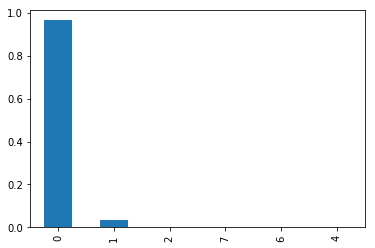

In [18]:
((df_polizas_pivoted.iloc[:,0:11] > 0).sum(axis=1).value_counts() / len((df_polizas_pivoted.iloc[:,0:11] > 0))).plot.bar()

In [18]:
(df_polizas_pivoted > 0).sum(axis=1).value_counts() / len(df_polizas_pivoted > 0)

5     0.776797
2     0.066294
1     0.061665
4     0.038280
3     0.035896
0     0.019828
6     0.001229
7     0.000009
11    0.000001
8     0.000001
dtype: float64

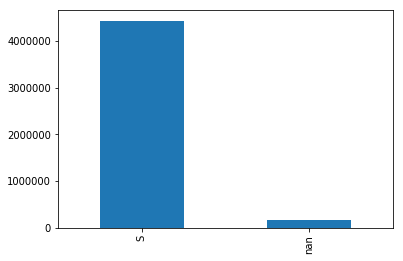

In [10]:
df_polizas['MCA_VIGENCIA'].value_counts(dropna=False).plot.bar()

In [11]:
df_polizas[df_polizas['CIF_ID']==1429]

,NUM_SECU_POL,NUM_POL1,FECHA_VIG_POL,FECHA_VENC_POL,COD_PLAN,COD_PROD,COD_COBRO,ESTADO_CIVIL_ASEGURADO,COD_POSTAL,IMP_BONIFICACION_MES,IMP_PREMIO_MES,IMP_PRIMA_FACT_MES,IMP_IMPUESTO_MES,FECHA_PROCESO,MCA_VIGENCIA,COD_COBRO_ANTERIOR,COD_MON,FECHA_VIG_ORIG_POL,MCA_AGRAVANTE,MCA_EMPLEADO,CAPITAL_VEHICULO,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,COD_RIES,ANTIGUEDAD,PRENDARIO,NEGOCIO,MCA_POLIZA_VIP,FECHA_EMI,PORC_COMISION,IMP_COMISION_LOCAL,CANT_RENOVACION,FECHA_ANTIG,ANTIG,CLIENTE_SUSCRIPTO,FECHA_VIG_POL_NPO,SEGMENTO,SEGMENTO_2,COD_ZONA_CASCO,PROXIMA_FECHA_RENOV,NEGOCIO_DESC,COD_SITUACION,CLAU_AJUSTE,COEF_POL,RULE_ID_RESPUESTA,CIF_ID,SEGMENTO_CLIENTE,mes_anio_vig
102024,1873116109999,6040056030206,2019-01-02,2019-02-02,964.0,73761,TM,CA,1620000,0.0,3395.70,2723.56,672.14,2019-01-31,S,TM,1,2017-08-21,N,N,657900.0,1080.0,719100.0,1,4053.0,N,EMP,S,2018-10-12,8.0,217.88,18.0,1996-11-21,8077.0,S,2017-08-21,ALTO,ALTO,2.0,2019-05-02,Empleados,CT,5.0,0.083333,76558.0,1429.0,1,2019-01
223324,1894898829999,6040056994504,2019-01-02,2019-02-02,964.0,73761,TM,CA,1620000,0.0,3007.59,2412.29,595.30,2019-01-31,S,TM,1,2016-09-26,N,N,408000.0,1080.0,408000.0,1,4053.0,N,EMP,S,2018-12-07,8.0,192.98,28.0,1996-11-21,8077.0,S,2016-09-26,ALTO,ALTO,2.0,2019-04-02,Empleados,CT,5.0,0.083333,101981.0,1429.0,1,2019-01
1156918,1873116109999,6040056030206,2019-01-02,2019-02-02,964.0,73761,TM,CA,1620000,0.0,3395.70,2723.56,672.14,2019-02-28,None,TM,1,2017-08-21,N,N,657900.0,1080.0,719100.0,1,NaN,N,EMP,S,2018-10-12,8.0,217.88,18.0,1996-11-21,8077.0,S,2017-08-21,ALTO,ALTO,2.0,2019-05-02,Empleados,None,5.0,0.083333,76558.0,1429.0,1,2019-01
1223437,1894898829999,6040056994504,2019-01-02,2019-02-02,964.0,73761,TM,CA,1620000,0.0,3007.59,2412.29,595.30,2019-02-28,None,TM,1,2016-09-26,N,N,408000.0,1080.0,408000.0,1,NaN,N,EMP,S,2018-12-07,8.0,192.98,28.0,1996-11-21,8077.0,S,2016-09-26,ALTO,ALTO,2.0,2019-04-02,Empleados,None,5.0,0.083333,101981.0,1429.0,1,2019-01


### Buscamos CIF_ID con tres meses consecutivos sin polizas

In [ ]:
df_polizas_pivoted[df_polizas_pivoted.astype(str).sum(1).str.contains('[\d]000')]

In [7]:
df_filtered = df_polizas_pivoted[df_polizas_pivoted.astype(str).sum(1).astype(str).str.contains('[\d]000')]

In [8]:
df_filtered

NUM_SECU_POL                                                  \
mes_anio_vig      2018-01 2018-02 2018-03 2018-04 2018-05 2018-06 2018-07   
CIF_ID                                                                      
1429.0                  0       0       0       0       0       0       0   
12648.0                 0       0       0       0       0       0       0   
15071.0                 0       0       0       0       0       0       0   
24694.0                 0       0       0       0       0       0       0   
30533.0                 0       0       0       0       0       0       0   
41512.0                 0       0       0       0       0       0       0   
50731.0                 0       0       0       0       0       0       0   
63655.0                 0       0       0       0       0       0       0   
65483.0                 0       0       0       0       0       0       0   
69867.0                 0       0       0       0       0       0       0   
70233.0                 0       0       0       0       0       0       0   
73305.0                 0       0       0       0       0       0       0   
75847.0                 0       0       0       0       0       0       0   
78804.0                 0       0       0       0       0       0       0   
80894.0                 0       0       0       0       0       0       0   
82553.0                 0       0       0       0       0       0       0   
83818.0                 0       0       0       0       0       0       0   
98530.0                 0       0       0       0       0       0       0   
108499.0                0       0       0       0       0       0       0   
111377.0                0       0       0       0       0       0       0   
113343.0                0       0       0       0       0       0       0   
114469.0                0       0       0       0       0       0       0   
118588.0                0       0       0       0       0       0       0   
118723.0                0       0       0       0       0       0       0   
119295.0                0       0       0       0       0       0       0   
119326.0                0       0       0       0       0       0       0   
120496.0                0       0       0       0       0       0       0   
122512.0                0       0       0       0       0       0       0   
126530.0                0       0       0       0       0       0       0   
127083.0                0       0       0       0       0       0       0   
129048.0                0       0       0       0       0       0       0   
136171.0                0       0       0       0       0       0       0   
136954.0                0       0       0       0       0       0       0   
137228.0                0       0       0       0       0       0       0   
138674.0                0       0       0       0       0       0       0   
146077.0                0       0       0       0       0       0       0   
146491.0                0       0       0       0       0       0       0   
147633.0                0       0       0       0       0       0       0   
148199.0                0       0       0       0       0       0       0   
149396.0                0       0       0       0       0       0       0   
149802.0                0       0       0       0       0       0       0   
151225.0                0       0       0       0       0       0       0   
155406.0                0       0       0       0       0       0       0   
155414.0                0       0       0       0       0       0       0   
157600.0                0       0       0       0       0       0       0   
158817.0                0       0       0       0       0       0       0   
163979.0                0       0       0       0       0       0       0   
164350.0                0       0       0       0       0       0       0   
190064.0                0       0       0       0       0       0       0   
192504.0 

In [12]:
CIF_ID_BAJAS = df_filtered.index.values

In [15]:
len(CIF_ID_BAJAS)/len(df_polizas_pivoted)

0.11213447496830758

In [19]:
df_bajas = pd.DataFrame(df_polizas_pivoted.index)

In [21]:
df_bajas['BAJA'] = df_bajas['CIF_ID'].isin(CIF_ID_BAJAS)

In [29]:
df_bajas = df_bajas.set_index('CIF_ID')
df_bajas.index = 

,BAJA
CIF_ID,
571.0,False
573.0,False
1009.0,False
1103.0,False
1313.0,False
1429.0,True
1482.0,False
1559.0,False
1774.0,False


In [31]:
df_polizas[df_polizas['CIF_ID']==15071]

,NUM_SECU_POL,NUM_POL1,FECHA_VIG_POL,FECHA_VENC_POL,COD_PLAN,COD_PROD,COD_COBRO,ESTADO_CIVIL_ASEGURADO,COD_POSTAL,IMP_BONIFICACION_MES,IMP_PREMIO_MES,IMP_PRIMA_FACT_MES,IMP_IMPUESTO_MES,FECHA_PROCESO,MCA_VIGENCIA,COD_COBRO_ANTERIOR,COD_MON,FECHA_VIG_ORIG_POL,MCA_AGRAVANTE,MCA_EMPLEADO,CAPITAL_VEHICULO,CAPITAL_ACCESORIOS,CAPITAL_ASEGURADO_COTIZACION,COD_RIES,ANTIGUEDAD,PRENDARIO,NEGOCIO,MCA_POLIZA_VIP,FECHA_EMI,PORC_COMISION,IMP_COMISION_LOCAL,CANT_RENOVACION,FECHA_ANTIG,ANTIG,CLIENTE_SUSCRIPTO,FECHA_VIG_POL_NPO,SEGMENTO,SEGMENTO_2,COD_ZONA_CASCO,PROXIMA_FECHA_RENOV,NEGOCIO_DESC,COD_SITUACION,CLAU_AJUSTE,COEF_POL,RULE_ID_RESPUESTA,CIF_ID,SEGMENTO_CLIENTE,mes_anio_vig
579276,1874674729999,5450052074605,2018-12-06,2019-01-06,973.0,5450,BA,SO,1708007,0.0,3781.74,3033.2,748.54,2019-01-31,None,BA,1,2018-08-06,N,N,408000.0,1080.0,464100.0,1,NaN,N,DEF,S,2018-10-14,0.0,0.0,5.0,1998-01-07,7638.0,S,2018-08-06,ALTO,ALTO,1.0,2019-05-06,Mostrador,None,5.0,0.083333,76558.0,15071.0,1,2018-12


In [34]:
df_bajas.reset_index().to_feather('../../../data/interim/BAJAS_X_CIF_ID.feather')

**Analizar asociación con la tabla pagos.feather**

In [3]:
df_pagos = pd.read_feather("../../../data/interim/pagos.feather")

In [23]:
len(df_pagos[df_pagos["NUM_SECU_POL"].isin(df_polizas["NUM_SECU_POL"].unique())])

1202336

In [7]:
vals = df_polizas[df_polizas["NUM_SECU_POL"].isin(df_pagos["NUM_SECU_POL"].unique())]["NUM_SECU_POL"]

In [6]:
len(set(df_polizas["NUM_SECU_POL"].unique()).intersection(set(df_pagos["NUM_SECU_POL"].unique()))) / len(df_pagos["NUM_SECU_POL"].unique()) * 100

33.07045907921395

In [4]:
len(set(df_polizas["NUM_SECU_POL"].unique()).intersection(set(df_pagos["NUM_SECU_POL"].unique())))

1082370

In [32]:
df_pagos.head(15)

,COD_CIA,COD_SECC,FECHA_EQUIPO,NUM_POL1,NUM_SECU_POL,NUM_END,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION
0,2,90,2019-03-19,5010000625601,9609992,NaN,2019-03-01,2019-03-01,1026.48,CC,CT
1,2,90,2019-03-11,5000000104101,1799992,NaN,2018-06-01,2019-04-01,33.84,CC,CT
2,2,90,2019-03-13,5170826702201,11116689999,NaN,2019-03-01,2019-04-01,22.56,CC,CT
3,2,90,2019-03-08,5130005681801,91449992,NaN,2019-03-01,2019-03-01,33.84,CC,CT
4,2,11,2019-03-01,5000612704001,360559968,NaN,2019-03-01,2019-03-01,130.00,TA,CT
5,2,11,2019-03-01,5000612711801,361269968,NaN,2019-03-01,2019-03-01,100.00,TA,CT
6,2,11,2019-03-01,5000612713501,361439968,NaN,2019-03-01,2019-03-01,100.00,TA,CT
7,2,11,2019-03-01,5000612716701,361709968,NaN,2019-04-01,2019-03-01,100.00,TA,CT
8,2,11,2019-03-01,5000612724501,362369968,NaN,2019-04-01,2019-03-01,23.70,TA,CT
9,2,90,2019-03-09,5280004902301,71909992,NaN,2019-03-01,2019-03-01,507.60,CC,CT


In [ ]:
df_pagos

In [30]:
polizas = list(df_polizas[df_polizas['CIF_ID']==1429]['NUM_SECU_POL'])

In [31]:
df_pagos[df_pagos['NUM_SECU_POL'].isin(polizas)]

,COD_CIA,COD_SECC,FECHA_EQUIPO,NUM_POL1,NUM_SECU_POL,NUM_END,FECHA_VTO,FEC_PAGO,MONTO_PAGO,COD_COBRO,COD_SITUACION


In [42]:
df_pagos["FEC_PAGO"].min(),df_pagos["FEC_PAGO"].max()

(Timestamp('1996-12-01 00:00:00'), Timestamp('2019-06-01 00:00:00'))

In [43]:
df_pagos['mes_anio_pago'] = df_pagos['FEC_PAGO'].dt.strftime('%Y-%m')

In [45]:
df_pagos.pivot_table(index='NUM_SECU_POL',columns=['mes_anio_pago'], values=['MONTO_PAGO'],aggfunc='sum')

MONTO_PAGO                                                  \
mes_anio_pago    1996-12 1997-01 1999-11 1999-12 2000-02 2000-03 2000-04   
NUM_SECU_POL                                                               
19990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
29990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
39990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
49992                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
59990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
59992                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
69990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
69992                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
79990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
89990                NaN     NaN     NaN     NaN     NaN     NaN     NaN   
119990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
129990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
149990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
149992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
159990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
159997               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
169990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
169997               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
179990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
189990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
199990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
209990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
229990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
239990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
259990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
299992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
319990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
349990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
359990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
379990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
399992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
419990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
429990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
429992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
439990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
449992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
459990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
469990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
479990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
489990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
499990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
529992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
549990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
559990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
559992               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
569990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
579990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
609990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
619990               NaN     NaN     NaN     NaN     NaN     NaN     NaN   
639990               NaN     NaN     NaN     NaN     NaN     N

In [47]:
df_pagos['FEC_PAGO'].isna().count()

5896849